## Importing Data 

In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
questions = pd.read_csv("data/questions.csv")
clients = pd.read_csv("data/clients.csv")

# alr included in `questions`:
categories = pd.read_csv("data/categories.csv")
subcategories = pd.read_csv("data/subcategories.csv")

#seems kind of useless to us:
statesites = pd.read_csv("data/statesites.csv")
attorney_timeentries = pd.read_csv("data/attorneytimeentries.csv")
attorneys = pd.read_csv("data/attorneys.csv")

In [28]:
question_posts = pd.read_csv("data/questionposts.csv", on_bad_lines='skip', low_memory=False)


In [130]:
questions
attorneys

,Id,StateAbbr,AttorneyUno,City,County,StateName,PostalCode,CreatedUtc
0,1,NH,7A2C12BE-9F37-4C9D-A6ED-41B916820CE0,Concord,Cheshire,New Hampshire,3301,2019-02-14 16:21:52
1,2,NH,29A49AA6-047E-4008-ABBD-3DE57156B526,Concord,Merrimack,New Hampshire,3229,2019-02-14 18:14:30
2,3,MS,9DF11B65-7F29-452C-A69E-54CD72E4A116,Jackson,Rankin,Mississippi,39203,2016-08-19 17:07:23
3,4,VA,693FD55F-5F58-405A-B389-5E78B3406497,Richmond,Richmond (city),Virginia,23219,2016-08-19 18:22:53
4,5,CT,0AC2A866-19CD-4D1A-94B7-BF41A1430553,Wethersfield,Hartford,Connecticut,6410,2016-08-21 01:21:13
...,...,...,...,...,...,...,...,...
11539,11540,VA,F2EC8DAD-D7B0-40B8-AFF2-F5705E2F59B0,Washington,Arlington,Virginia,20037,2021-11-03 15:16:31
11540,11541,VA,386CD203-A6E0-4C8F-90D3-0EEEC2701CA3,Virginia Beach,Virginia Beach city,Virginia,23451,2021-11-04 13:56:07
11541,11542,VA,1C366F1B-0990-4847-8B47-D56D426AD964,Virginia Beach,Virginia Beach city,Virginia,23451,2021-11-15 20:31:02
11542,11543,VA,FE8B3662-7C55-416A-B123-C3F9A9F3CAFA,Richmond,Richmond city,Virginia,23225,2021-11-15 23:27:59


## Combining Df's

In [133]:
df = pd.merge(questions, clients, left_on = "AskedByClientUno", right_on = "ClientUno")
#df = pd.merge(df, attorneys, on = "AttorneyUno")
list(df.keys())

['Id_x',
 'StateAbbr_x',
 'QuestionUno',
 'CategoryUno',
 'Category',
 'SubcategoryUno',
 'Subcategory',
 'AskedByClientUno',
 'AskedOnUtc',
 'TakenByAttorneyUno',
 'TakenOnUtc',
 'ClosedByAttorneyUno',
 'ClosedOnUtc',
 'LegalDeadline',
 'Id_y',
 'StateAbbr_y',
 'ClientUno',
 'County',
 'StateName',
 'PostalCode',
 'EthnicIdentity',
 'Age',
 'Gender',
 'MaritalStatus',
 'Veteran',
 'Imprisoned',
 'NumberInHousehold',
 'AnnualIncome',
 'AllowedIncome',
 'CheckingBalance',
 'SavingsBalance',
 'InvestmentsBalance',
 'CreatedUtc']

In [83]:
df.isna().sum()

Id_x                        0
StateAbbr_x                 0
QuestionUno                 0
CategoryUno                 0
Category                    0
SubcategoryUno              0
Subcategory                 0
AskedByClientUno            0
AskedOnUtc                  0
TakenByAttorneyUno      58857
TakenOnUtc              57214
ClosedByAttorneyUno     65070
ClosedOnUtc              3793
LegalDeadline          158906
Id_y                        0
StateAbbr_y                 0
ClientUno                   0
County                    212
StateName                   0
PostalCode              16180
EthnicIdentity          32022
Age                     16054
Gender                  30981
MaritalStatus           31372
Veteran                 36893
Imprisoned              15557
NumberInHousehold       15557
AnnualIncome            15579
AllowedIncome           15557
CheckingBalance         62250
SavingsBalance         136598
InvestmentsBalance     197383
CreatedUtc                  0
dtype: int

In [87]:
pd.isna(df["TakenByAttorneyUno"])

0          True
1          True
2         False
3         False
4          True
          ...  
202836     True
202837     True
202838    False
202839     True
202840     True
Name: TakenByAttorneyUno, Length: 202841, dtype: bool

### Creating dummy variable to indicate whether or not a question was taken on

In [137]:
df["TakenOn"] = ~pd.isna(df["TakenByAttorneyUno"]) *1
df

## YAYYYY WE MADE A NEW COLUMN
## 0 if not taken on, 1 if taken on

,Id_x,StateAbbr_x,QuestionUno,CategoryUno,Category,SubcategoryUno,Subcategory,AskedByClientUno,AskedOnUtc,TakenByAttorneyUno,...,Veteran,Imprisoned,NumberInHousehold,AnnualIncome,AllowedIncome,CheckingBalance,SavingsBalance,InvestmentsBalance,CreatedUtc,TakenOn
0,1,NC,BB53B2A4-7C1B-45C3-9693-62047889317D,C932D197-7F43-4BCF-BE0B-FE5F5DBCB9EF,Family and Children,E9F87919-0CD5-4D9D-AAC6-3CBC49132F1D,Family/Divorce/Custody/Visitation/Child Support,9C35423C-914A-42BC-8EBC-A370E76E2178,2019-06-19 22:10:06,NaN,...,No,No,3.0,0.0,41910.0,0.0,NaN,NaN,2019-06-19 21:06:19,0
1,2,NC,0C49F841-2782-4313-961E-7882B96D0854,C8E1275A-6C42-42E4-9B7D-231BAC438FC9,Individual Rights,73A59926-BA0B-44EC-ABF3-F4C9181EEA83,Civil/Constitutional Rights,DF636AEE-7D08-4F90-9A5C-0A2A726C6B59,2019-06-19 23:34:36,NaN,...,No,No,4.0,9240.0,56070.0,26.0,5.0,NaN,2019-06-19 22:22:13,0
2,3,NC,BFC28E08-B6B1-4185-A91A-89DF90816BE4,C8E1275A-6C42-42E4-9B7D-231BAC438FC9,Individual Rights,73A59926-BA0B-44EC-ABF3-F4C9181EEA83,Civil/Constitutional Rights,DF636AEE-7D08-4F90-9A5C-0A2A726C6B59,2019-06-19 23:57:18,FA34142B-1575-4720-981C-2D28C3560137,...,No,No,4.0,9240.0,56070.0,26.0,5.0,NaN,2019-06-19 22:22:13,1
3,4,NC,45B24109-243A-489B-B0D2-2F36C2A369FE,C932D197-7F43-4BCF-BE0B-FE5F5DBCB9EF,Family and Children,E9F87919-0CD5-4D9D-AAC6-3CBC49132F1D,Family/Divorce/Custody/Visitation/Child Support,C9C3FA40-0D60-49B9-97F1-63AFEFAFA484,2019-06-20 02:33:14,FA34142B-1575-4720-981C-2D28C3560137,...,No,No,2.0,1600.0,27750.0,1600.0,0.0,NaN,2019-06-19 13:04:42,1
4,5,NC,C4707F71-FE4A-4154-8174-AF00BEE2B361,F6016FBD-9501-4448-BCD3-BBB0E834E33B,Consumer Financial Questions,73FE486E-2B51-456A-A6D9-78A7D05802AA,"Bankruptcy, Debts & Purchases",ED7DEA10-CDB7-4A05-891D-889D1EA710BE,2019-06-20 17:04:47,NaN,...,No,No,2.0,12000.0,27750.0,50.0,NaN,NaN,2019-06-20 16:47:35,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202836,202873,NC,89608F82-F69E-4861-9168-26C9CB5B6819,C8E1275A-6C42-42E4-9B7D-231BAC438FC9,Individual Rights,73A59926-BA0B-44EC-ABF3-F4C9181EEA83,Civil/Constitutional Rights,72D652E6-BCD1-487E-9DBF-51BA7DE1C70C,2019-06-17 14:47:30,NaN,...,No,No,4.0,3500.0,56070.0,200.0,1600.0,NaN,2019-06-17 14:24:56,0
202837,202874,NC,CA25F02B-DFBE-4499-A8EC-284C9B792801,C8E1275A-6C42-42E4-9B7D-231BAC438FC9,Individual Rights,73A59926-BA0B-44EC-ABF3-F4C9181EEA83,Civil/Constitutional Rights,F7B176B0-3CD0-46AB-87FA-D2779F193D81,2019-06-17 20:47:14,NaN,...,No,No,1.0,0.0,13590.0,NaN,NaN,NaN,2019-06-17 20:19:33,0
202838,202875,NC,376FFF48-9068-4A8F-9316-2EB5A7E38001,E6F4FD7C-FCE9-4763-AADD-0544158DE0BB,Other,E3257971-6837-4BAD-B00D-E4040F0C8B8A,Civil Procedure,82BDD11F-2168-4A44-BBFC-BA9B0543F289,2019-06-17 20:37:01,6E43EC98-8700-4439-98A9-52B663CCE348,...,No,No,1.0,6000.0,13590.0,80.0,NaN,NaN,2019-06-17 20:09:32,1
202839,202877,NC,B80305AA-7509-436E-AFF8-6B33AC682730,E6F4FD7C-FCE9-4763-AADD-0544158DE0BB,Other,E3257971-6837-4BAD-B00D-E4040F0C8B8A,Civil Procedure,35133217-A30F-42A7-8EB4-E15A03026247,2019-06-18 15:33:13,NaN,...,No,No,2.0,0.0,27750.0,125.0,0.0,NaN,2019-06-18 14:53:02,0


In [125]:
# saving this df
df.to_csv('df.csv')

## Creating Ratios to compare taken on vs not taken on by variable

### By State

In [145]:
# per state, number of questions asked (requests)

takenon_count = df.groupby(by = "StateAbbr_x").count()["TakenOn"]
takenon_count

StateAbbr_x
AK      862
AL      848
AR     2436
AZ     5453
CA     2324
CT     1170
FL    19864
GA     7605
HI     2136
IA     1861
ID        1
IL    14074
IN    20760
KS      498
LA     3824
MA     8814
MD     2590
ME     3407
MI      512
MO     9054
MS     1501
NC     6054
NE     3280
NH     1444
NJ      768
NM      967
NY     5610
OK     5452
PA      693
SC    14192
SD     1126
TN    11287
TX    21225
US      305
UT     1872
VA     5466
VT     1074
WI     7466
WV     3342
WY     1624
Name: TakenOn, dtype: int64

In [119]:
# per state, number of questions taken on (answered, begun answering)

takenon_sum = df.groupby(by = "StateAbbr_x").sum()["TakenOn"]
takenon_sum

StateAbbr_x
AK      499
AL      573
AR     1973
AZ     1342
CA     1082
CT      773
FL    17192
GA     1553
HI     1557
IA      790
ID        0
IL    10737
IN     9655
KS      121
LA     3131
MA     6947
MD     1649
ME     2872
MI      340
MO     7896
MS      981
NC     5031
NE     2453
NH     1123
NJ      606
NM      787
NY     4921
OK     3602
PA      126
SC    11275
SD     1049
TN    10316
TX    12841
US      117
UT     1553
VA     4994
VT      726
WI     6755
WV     2686
WY     1360
Name: TakenOn, dtype: int64

In [122]:
# For every question asked, how many were actually taken on? 
# Proportion of questions asked that were answered

takenon_ratio = takenon_sum / takenon_count
takenon_ratio

StateAbbr_x
AK    0.578886
AL    0.675708
AR    0.809934
AZ    0.246103
CA    0.465577
CT    0.660684
FL    0.865485
GA    0.204208
HI    0.728933
IA    0.424503
ID    0.000000
IL    0.762896
IN    0.465077
KS    0.242972
LA    0.818776
MA    0.788178
MD    0.636680
ME    0.842970
MI    0.664062
MO    0.872101
MS    0.653564
NC    0.831021
NE    0.747866
NH    0.777701
NJ    0.789062
NM    0.813857
NY    0.877184
OK    0.660675
PA    0.181818
SC    0.794462
SD    0.931616
TN    0.913972
TX    0.604994
US    0.383607
UT    0.829594
VA    0.913648
VT    0.675978
WI    0.904768
WV    0.803710
WY    0.837438
Name: TakenOn, dtype: float64

In [126]:
takenon_ratio.to_csv('takenon_ratio.csv')

### Trying to make a map lol

In [158]:
df_stateratio = takenon_ratio.to_frame()
df_stateratio = df_stateratio.reset_index()

df_takenon_count = takenon_count.to_frame()
df_takenon_count = df_takenon_count.reset_index()

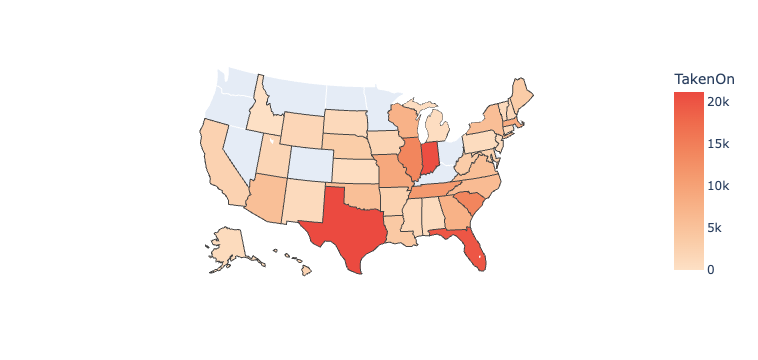

In [159]:
import plotly.express as px
fig1 = px.choropleth(df_takenon_count,
                    locations='StateAbbr_x', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='TakenOn',
                    color_continuous_scale="peach")
fig1.show()

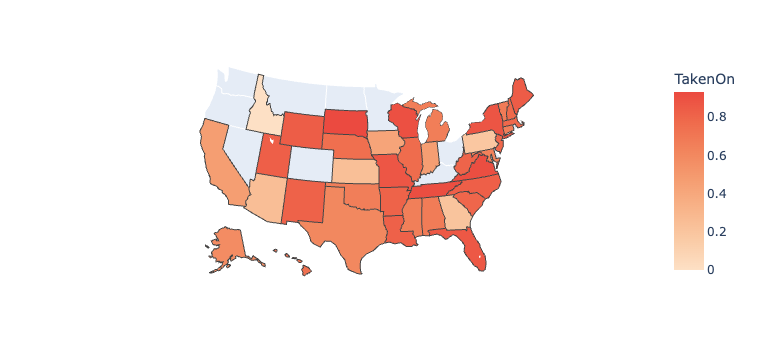

In [160]:
fig2 = px.choropleth(df_stateratio,
                    locations='StateAbbr_x', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='TakenOn',
                    color_continuous_scale="peach")
fig2.show()

### By Category

In [140]:
# per category, number of questions asked (requests)

cat_takenon_count = df.groupby(by = "Category").count()["TakenOn"]
cat_takenon_sum = df.groupby(by = "Category").sum()["TakenOn"]
cat_takenon_ratio = cat_takenon_sum / cat_takenon_count
cat_takenon_ratio

Category
Consumer Financial Questions         0.752911
Education                            0.649874
Family and Children                  0.717578
Health and Disability                0.628603
Housing and Homelessness             0.759927
Income Maintenance                   0.613467
Individual Rights                    0.597089
Juvenile                             0.574230
Other                                0.663895
Work, Employment and Unemployment    0.714019
Name: TakenOn, dtype: float64

## By ??

In [141]:
# per subcategory, number of questions asked (requests)

subcat_takenon_count = df.groupby(by = "Subcategory").count()["TakenOn"]
subcat_takenon_count

#cat_takenon_sum = df.groupby(by = "Category").sum()["TakenOn"]
#cat_takenon_ratio = cat_takenon_sum / cat_takenon_count
#cat_takenon_ratio

Subcategory
2019 Flood â€”Housing              3
2019 Flood â€”Insurance            1
2019 Flood â€”Other                3
2019 Flood â€”Wills/Probate        4
Adoption                          96
                                ... 
Worker's Comp                    295
Worker's Compensation             17
Workers Compensation               4
Workers Compensation Benefits      5
Workers' Comp                     49
Name: TakenOn, Length: 346, dtype: int64